In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import glob

import tifffile as tf

import os

path = "/home/patrick/github/data"

filenames = glob.glob(os.path.join(path, "dm*/**/*.tif*"), recursive=True)

print(len(filenames))

In [ ]:
# filter lamella, landing

print(len(filenames))
# filenames = [fname for fname in filenames if "ref_landing" not in fname and "ref_lamella" not in fname and "trench" not in fname and "low_res" not in fname]

filenames = [fname for fname in filenames if "needle" in fname]
print(len(filenames))

In [ ]:
for fname in filenames[:10]:
    img = tf.imread(fname)
    plt.imshow(img, cmap="gray")
    plt.show()

In [ ]:
save_path = "/home/patrick/github/data/training"
for i, fname in enumerate(filenames):
    
    img = tf.imread(fname)
    new_fname = os.path.join(save_path,f"a{i:05d}.tif")

    tf.imsave(new_fname, img)


In [ ]:
train_filenames = sorted(glob.glob(os.path.join(save_path, "*.tif")))
for fname in train_filenames[:10]:

    img = tf.imread(fname)
    plt.imshow(img, cmap="gray")
    plt.show()

In [ ]:
import zarr

images = zarr.open(tf.imread(os.path.join("/home/patrick/github/data/training/", "images", "*.tif*"), aszarr=True)) 
labels = zarr.open(tf.imread(os.path.join("/home/patrick/github/data/training/", "labels","*.tif*"), aszarr=True))


print(images.shape)
print(labels.shape)


for img, label in zip(images, labels):


    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img, cmap="gray")
    ax[1].imshow(label)
    plt.show()



### Model Testing

In [ ]:
%load_ext autoreload
%autoreload 2 


import glob
import os
import tifffile as tf
import matplotlib.pyplot as plt

images = sorted(glob.glob(os.path.join("/home/patrick/github/data/training/train/images", "*.tif*")))
labels = sorted(glob.glob(os.path.join("/home/patrick/github/data/training/train/labels", "*.tif*")))

for ii, (i, l) in enumerate(zip(images, labels)):
    print(os.path.basename(i), os.path.basename(l))

    img, lbl = tf.imread(i), tf.imread(l)

    fig, ax = plt.subplots(1, 2, figsize=(7, 5))
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("Image")
    ax[1].imshow(lbl)
    ax[1].set_title("Label")
    plt.show()
    
    if ii == 2:
        break



In [ ]:
filenames = sorted(glob.glob(os.path.join("/home/patrick/github/data/liftout/training/train/images/", "*.tif*")))

print("files: ", len(filenames))
# filenames.append(*list(sorted(glob.glob(os.path.join("/home/patrick/github/data/training/train/images/", "*.tif*")))
print("files: ", len(filenames))
import random
random.shuffle(filenames)


from fibsem.segmentation.model import SegmentationModel

baseline = "/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt"
# checkpoint_2 = "/home/patrick/github/fibsem/fibsem/segmentation/models/03_11_2022_19_01_51_n08_model.pt"
# checkpoint_5 = "/home/patrick/github/fibsem/fibsem/segmentation/models/03_11_2022_19_00_58_n05_model.pt"
# checkpoint_10 = "/home/patrick/github/fibsem/fibsem/segmentation/models/03_11_2022_19_02_27_n10_model.pt"
# checkpoints = [baseline, checkpoint_2, checkpoint_5, checkpoint_10]

small_model = "/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt"
# checkpoint_10 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined/03_11_2022_20_00_10_n10_model.pt"
# checkpoint_15 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined/03_11_2022_20_09_22_n15_model.pt"
# checkpoint_20 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined/03_11_2022_20_18_32_n20_model.pt"

checkpoint_10 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined34/04_11_2022_18_37_32_n10_model.pt"
checkpoint_15 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined34/04_11_2022_18_46_48_n15_model.pt"
checkpoint_20 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined34/04_11_2022_18_56_00_n20_model.pt"


checkpoints = [baseline, small_model, checkpoint_10, checkpoint_15, checkpoint_20]
for i, fname in enumerate(filenames):

    img = tf.imread(fname)

    print(i, fname) 

    fig, ax = plt.subplots(1, len(checkpoints) + 1, figsize=(15, 5))
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("Image")


    titles = ["Baseline", "Update", "Checkpoint 10", "Checkpoint 15", "Checkpoint 20"]
    for j, (checkpoint, title) in enumerate(zip(checkpoints, titles), 1):
        model = SegmentationModel(checkpoint=checkpoint, num_classes=3)

        mask = model.inference(img)

        ax[j].imshow(mask)
        ax[j].set_title(title)

    save_path = "results34"
    os.makedirs(save_path, exist_ok=True)
    fig.savefig(os.path.join(save_path, f"{os.path.basename(fname).replace('tif', 'png')}"))

    plt.show()

### Pattern Testing


In [ ]:
%load_ext autoreload
%autoreload 2

from fibsem import utils, patterning
import matplotlib.pyplot as plt

# protocol_path = "/home/patrick/github/autoliftout/liftout/protocol/protocol.yaml"
protocol_path = r"C:\Users\pcle0002\Documents\repos\autoliftout\liftout\protocol\protocol.yaml"
microscope, settings = utils.setup_session(protocol_path=protocol_path)

In [ ]:
patterns_fn = {f"{pattern.name}": pattern for pattern in patterning.__PATTERNS__}

from pprint import pprint

pprint(patterns_fn)

In [ ]:
from fibsem.structures import FibsemPatternSettings, FibsemPattern

rect_pattern = patterns_fn["Rectangle"]()

rp = rect_pattern.define(protocol={"pattern": "Rectangle", "width": 10e-6, "height": 5e-6, 
                                              "depth": 2e-6, "rotation": 0, 
                                              "centre_x": 0, "centre_y": 0, 
                                              "scan_direction": "TopToBottom", "cleaning_cross_section": True})


print(rp)

In [ ]:



pattern_fn = patterns_fn["Trench"]()
print(pattern_fn.required_keys)
pattern = pattern_fn.define(protocol=settings.protocol["polish_lamella"])

pprint(pattern)

print("---------------------------------------")

In [ ]:
for p in patterns_fn:
    print(p, patterns_fn[p], patterns_fn[p]())

### Test AutoFOCUS



In [ ]:
%load_ext autoreload
%autoreload 2

import sys
from fibsem import utils, calibration, patterning
from fibsem.structures import BeamType

In [ ]:
microscope, settings = utils.setup_session()

In [ ]:
# default
calibration.auto_focus_beam(microscope, settings, beam_type=BeamType.ELECTRON)

In [ ]:
wd = microscope.get("working_distance", BeamType.ELECTRON)
print(f"working distance: {wd:2e}")

In [ ]:
# sharpness
from fibsem.calibration import _sharpness, _dog
calibration.auto_focus_beam(microscope=microscope, settings=settings, 
                            beam_type=BeamType.ELECTRON, 
                            metric_fn=_sharpness, kwargs={"disk_size": 5}, 
                            num_steps=20, step_size=0.05e-3)

In [ ]:
calibration.auto_focus_beam(microscope, settings, beam_type=BeamType.ELECTRON, metric_fn=_dog, num_steps=10, verbose=True)

In [ ]:
wd = wd
wd1 = microscope.get("working_distance", BeamType.ELECTRON)

In [ ]:
print(f"working distance: {wd:2e}") # default
print(f"working distance: {wd1:2e}") # fibsem 

In [ ]:
settings.image.beam_type = BeamType.ELECTRON
settings.image.save = True

from fibsem import acquire

microscope.set("working_distance", wd, BeamType.ELECTRON)
settings.image.label = "default_autofocus"
eb_image = acquire.new_image(microscope, settings.image)

In [ ]:
microscope.set("working_distance", wd1, BeamType.ELECTRON)
settings.image.label = "fibsem_autofocus"
eb_image = acquire.new_image(microscope, settings.image)

In [ ]:
import numpy as np
wds = np.linspace(3.5e-3, 4.5e-3, 20)

settings.image.save = True
settings.image.save_path = r"C:\Users\Admin\Github\fibsem\demo_2023-03-13-10-27-17AM"

for wd in wds:
    print(f"wd_{wd:.4e}".replace('.', '_'))
    microscope.set("working_distance", wd, BeamType.ELECTRON)
    settings.image.label = f"wd_{wd:.4e}".replace('.', '_')
    eb_image = acquire.new_image(microscope, settings.image)

## Manipulator Testing

In [ ]:
%load_ext autoreload
%autoreload 2

from fibsem import utils, acquire, movement

from fibsem.structures import BeamType, FibsemManipulatorPosition


microscope, settings = utils.setup_session()

In [ ]:
# microscope.insert_manipulator()
settings.image.hfw = 400e-6
images = acquire.take_reference_images(microscope, settings.image)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].imshow(images[0].data, cmap="gray")
ax[0].set_title("Electron Image 01")
ax[1].imshow(images[1].data, cmap="gray")
ax[1].set_title("IOn Image 02")
plt.show()

# #position = FibsemManipulatorPosition(x=20e-6, y=20e-6, z=20e-6, r=0, t=0)
# microscope.move_manipulator_corrected(dx = 20e-6, dy = 20e-6, beam_type=BeamType.ELECTRON)
position = FibsemManipulatorPosition(z=20e-6)
microscope.move_manipulator_to_position_offset(position, name="EUCENTRIC")

images_new = acquire.take_reference_images(microscope, settings.image)
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].imshow(images_new[0].data, cmap="gray")
ax[0].set_title("Electron Image 01")
ax[1].imshow(images_new[1].data, cmap="gray")
ax[1].set_title("IOn Image 02")
plt.show()
microscope.get_manipulator_position()


## Gas Injection System


In [ ]:
%load_ext autoreload
%autoreload 2

from fibsem.structures import BeamType

from fibsem import utils, acquire, movement

microscope, settings = utils.setup_session()


In [ ]:
from fibsem import gis

print(gis.gis_protocol)

In [ ]:
gis.sputter_platinum(microscope, gis.gis_protocol)

In [ ]:
gis.cryo_sputter(microscope, gis.gis_protocol, name="cryo_sputter_eb_grid_01")


## Manipulator Position Testing



In [1]:
%load_ext autoreload
%autoreload 2

from fibsem import utils, acquire
from fibsem.structures import BeamType, FibsemManipulatorPosition, FibsemStagePosition

from liftout import actions
import matplotlib.pyplot as plt



microscope, settings = utils.setup_session(manufacturer="Thermo", ip_address="10.0.0.1")




c:\Users\Admin\.conda\envs\liftout\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\.conda\envs\liftout\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Admin\.conda\envs\liftout\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


2023-07-17 15:31:31,096 — root — INFO — connect_to_microscope:439 — Microscope client connecting to [10.0.0.1:7520]
Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]
2023-07-17 15:31:31,101 — root — INFO — connect_to_microscope:441 — Microscope client connected to [10.0.0.1:7520]
2023-07-17 15:31:31,103 — root — INFO — connect_to_microscope:445 — Microscope client connected to model Helios G4 PFIB UNSPECIFIED with serial number 9925949 and software version 14.5.1.432.
2023-07-17 15:31:31,103 — root — INFO — setup_session:219 — Finished setup for session: demo_2023-07-17-03-31-31PM


2023-07-17 15:35:20,640 — root — INFO — retract_manipulator:1065 — retracting needle to ManipulatorPosition(x=-0.00040993043, y=0.00037714291, z=0.016839158, coordinate_system=Raw)


2023-07-17 15:35:24,576 — root — INFO — retract_manipulator:1068 — retracting needle...
2023-07-17 15:35:29,447 — root — INFO — retract_manipulator:1070 — retract needle complete
2023-07-17 15:35:35,943 — root — INFO — insert_manipulator:1050 — inserted needle to ManipulatorPosition(x=-0.00040993043, y=0.00037714291, z=-0.00018813668, coordinate_system=Raw).
2023-07-17 15:35:39,644 — root — INFO — autocontrast:578 — Running autocontrast on ELECTRON.
2023-07-17 15:35:40,101 — root — INFO — acquire_image:494 — acquiring new ELECTRON image.
2023-07-17 15:35:42,164 — root — INFO — autocontrast:578 — Running autocontrast on ION.
2023-07-17 15:35:42,529 — root — INFO — acquire_image:494 — acquiring new ION image.


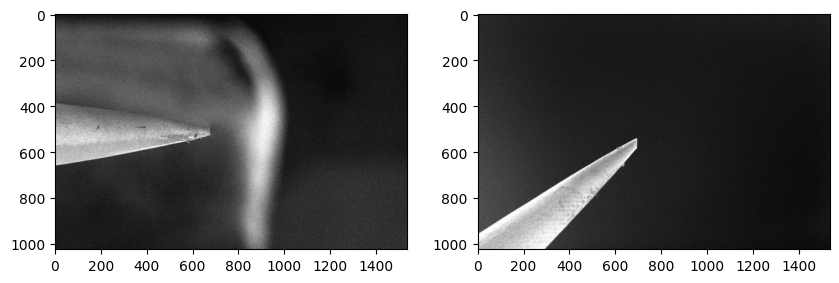

2023-07-17 15:35:44,963 — root — INFO — insert_manipulator:1050 — inserted needle to ManipulatorPosition(x=-0.00040993043, y=0.00037714291, z=0.016839158, coordinate_system=Raw).
2023-07-17 15:35:48,748 — root — INFO — autocontrast:578 — Running autocontrast on ELECTRON.
2023-07-17 15:35:49,239 — root — INFO — acquire_image:494 — acquiring new ELECTRON image.
2023-07-17 15:35:51,262 — root — INFO — autocontrast:578 — Running autocontrast on ION.
2023-07-17 15:35:51,982 — root — INFO — acquire_image:494 — acquiring new ION image.


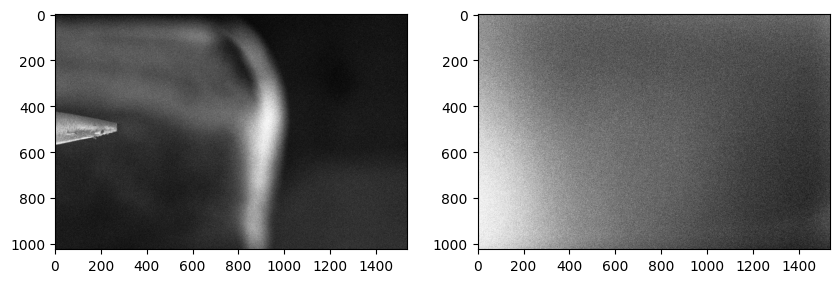

2023-07-17 15:35:54,410 — root — INFO — insert_manipulator:1050 — inserted needle to ManipulatorPosition(x=-0.00040993043, y=0.00037714291, z=0.016839158, coordinate_system=Raw).
2023-07-17 15:35:54,412 — root — INFO — move_manipulator_absolute:1099 — moving manipulator to ManipulatorPosition(x=1.7877704e-10, y=-4.9968029e-09, z=1.7136279e-13, coordinate_system=Stage)
2023-07-17 15:35:58,638 — root — INFO — autocontrast:578 — Running autocontrast on ELECTRON.
2023-07-17 15:35:59,175 — root — INFO — acquire_image:494 — acquiring new ELECTRON image.
2023-07-17 15:36:01,188 — root — INFO — autocontrast:578 — Running autocontrast on ION.
2023-07-17 15:36:01,871 — root — INFO — acquire_image:494 — acquiring new ION image.


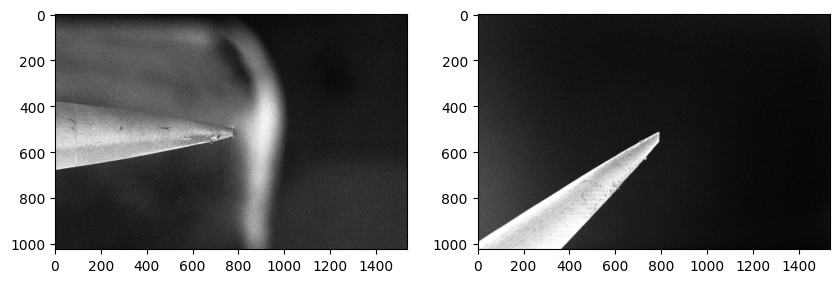

In [6]:
microscope.retract_manipulator()

settings.image.hfw = 400e-6

# eb_image, ib_image = acquire.take_reference_images(microscope, settings.image)
# fig, ax = plt.subplots(1, 2, figsize=(10, 7))
# ax[0].imshow(eb_image.data, cmap="gray")
# ax[1].imshow(ib_image.data, cmap="gray")
# plt.show()

actions.move_needle_to_liftout_position(microscope)

eb_image, ib_image = acquire.take_reference_images(microscope, settings.image)

fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].imshow(eb_image.data, cmap="gray")
ax[1].imshow(ib_image.data, cmap="gray")
plt.show()

actions.move_needle_to_landing_position(microscope)

eb_image, ib_image = acquire.take_reference_images(microscope, settings.image)

fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].imshow(eb_image.data, cmap="gray")
ax[1].imshow(ib_image.data, cmap="gray")
plt.show()

actions.move_needle_to_reset_position(microscope)

eb_image, ib_image = acquire.take_reference_images(microscope, settings.image)

fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].imshow(eb_image.data, cmap="gray")
ax[1].imshow(ib_image.data, cmap="gray")
plt.show()

